# Content and Objective

+ Realizations of a random walk are generated
+ Histogram of values at a given time is shown (thereby demonstrating the central limit theorem)
+ Acf is determined to show that the process is not stationary

# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Function for Random Walks

In [3]:
# Function for Generating Poisson Processes
def get_Random_Walk( N ):
    """
    Function generating a Random Walk by adding-up changes distributed uniformly on {+1,-1}
    
    IN:     N, number of steps/changes to be simulated
              
    OUT:    X, random walk
    """
    
    
    # sample steps uniformly out of { -1, +1 }
    steps = - 1 + 2 * np.random.randint( 2, size = N - 1 )

    # alternative solution
    #steps = np.random.choice( [-1, 1], size = N - 1 )
    
    # process by summing up increments
    X = np.append( 0, np.cumsum( steps ) )
    
    return X

# Showing a Bunch of Realizations for a Random Walk

In [4]:
# increase N_real if multiple realization should be plotted
N_steps = 50
N_trials = 1000


# initialize array for storing multiple processes
X_random_walk = np.zeros( ( N_trials, N_steps + 1 ) )

# loop for realizations
for n in range( N_trials ):
    
    # get realizations of Poisson process
    X_random_walk[ n, : ] = get_Random_Walk( N_steps + 1)

<BarContainer object of 100 artists>

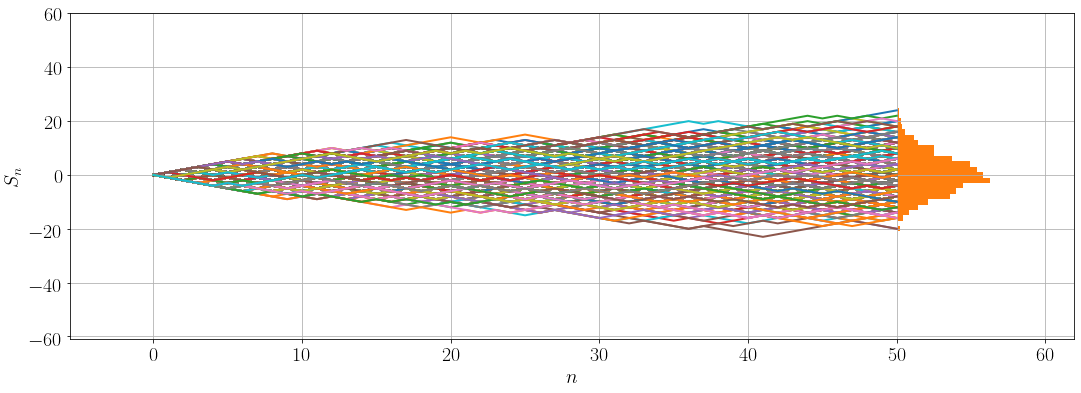

In [5]:
# plotting
for n in np.arange( N_trials ): 
    plt.plot( X_random_walk[ n, :], linewidth = 2.0 )    

plt.grid( True )
plt.xlabel('$n$')
plt.ylabel('$S_n$')
plt.margins(.1)


# extract end-points
results_end = X_random_walk[ : , -1 ]

# get histogram
num_bins = 2 * N_steps + 1 # ----> EXERCISE: Can you justify the choice of num_bins?!

width = 2
bins = np.linspace( -N_steps, N_steps, num_bins, endpoint=True)
r_hist = np.histogram( results_end, bins = bins, density = True )

plt.barh( r_hist[1][:-1], 0 + r_hist[0] / np.sum(r_hist[0]) * N_trials / 20 , width, left=N_steps+0.1, color = '#ff7f0e' )

# Determining ACF of the Random Walk

In [6]:
# sample time and tau vector
t = np.arange( 0, N_steps )

tau_acf = np.arange( - N_steps, N_steps )
tau_acf_pos = np.arange( 0, N_steps )


# initialize array for storing multiple processes
X_random_walk = np.zeros( ( N_trials, 3 * N_trials ) )

# loop for realizations
for n in range( N_trials ):
    
    # get realizations of random walk
    # NOTE: zeros are padded in order to avoid border effects
    X_random_walk[ n, : len(t) ] = get_Random_Walk( N_steps )
    
    
# initialize empty two-dim array (t and tau)
acf_2d = np.zeros( ( len(t), len(tau_acf) ) )

# loop for all times
for ind_t, val_t in enumerate( t ):

    # loop for all delays
    for ind_tau, val_tau in enumerate( tau_acf_pos ):

        # get acf at according index/time/delay
        corr = [ X_random_walk[ _n, ind_t + ind_tau ] 
                    * X_random_walk[ _n, ind_t ]
                    for _n in range( N_trials ) ]                   
        
        # assign acf
        # NOTE: Negative shifts are given by acf( -tau ) = acf( tau ) for real-valued processes
        acf_2d[ ind_t, + ind_tau + len(t) ] = np.sum( corr ) / N_trials 
        acf_2d[ ind_t, - ind_tau + len(t) ] = np.sum( corr ) / N_trials 

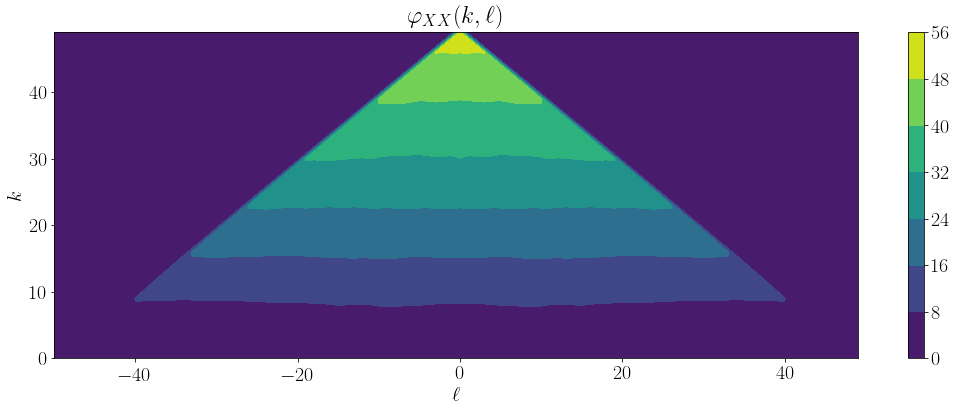

In [7]:
# parameters for meshing
T, Tau_acf = np.meshgrid( tau_acf, t )

# plotting
plt.contourf( T, Tau_acf , acf_2d[ : , : ] )

plt.xlabel('$\ell$')
plt.ylabel('$k$')
plt.title('$\\varphi_{XX}(k,\ell)$')
plt.colorbar();